In [7]:
#Original code based on https://github.com/karimbahgat/Pytess/blob/master/__private__/old_drafts/voronoi_test.py
from PIL import Image
import random
import math
 
def generate_voronoi_diagram(width, height, num_cells):
    image = Image.new("RGB", (width, height))
    putpixel = image.putpixel
    imgx, imgy = image.size
    nx = []
    ny = []
    nr = []
    ng = []
    nb = []
    for i in range(num_cells):
        nx.append(random.randrange(imgx))
        ny.append(random.randrange(imgy))
        nr.append(random.randrange(256))
        ng.append(random.randrange(256))
        nb.append(random.randrange(256))
    for y in range(imgy):
        for x in range(imgx):
            dmin = math.hypot(imgx-1, imgy-1)
            j = -1
            for i in range(num_cells):
                d = math.hypot(nx[i]-x, ny[i]-y)
                if d < dmin:
                    dmin = d
                    j = i
            putpixel((x, y), (nr[j], ng[j], nb[j]))
    image.save("VoronoiDiagram.png", "PNG")
    image.show()
 
generate_voronoi_diagram(500, 500, 25)

In [11]:
image = np.zeros(shape=(50,50,3))
imgx, imgy, z = image.shape

In [63]:
%matplotlib inline
import numpy as np

import random
import math
from matplotlib import pyplot as plt
import matplotlib.patches as mpatches

 
def generate_voronoi_diagram(width, height, num_cells):
    
    image = np.zeros(shape=(width,height,3))
    imgx, imgy, imgz = image.shape
    nx = []
    ny = []
    nr = []
    ng = []
    nb = []
    #Creates a synthetic set of points
    for i in range(num_cells):
        nx.append(random.randrange(imgx))
        ny.append(random.randrange(imgy))
        nr.append(random.randrange(256))
        ng.append(random.randrange(256))
        nb.append(random.randrange(256))
        
    for y in range(imgy):
        for x in range(imgx):
            dmin = math.hypot(imgx-1, imgy-1)
            j = -1
            for i in range(num_cells):
                d = math.hypot(nx[i]-x, ny[i]-y)
                if d < dmin:
                    dmin = d
                    j = i
            image[x,y] = nr[j], ng[j], nb[j]  
    #plt.imshow(image)

    
    return image
 


In [66]:
def vizOutcomeSimulation(num_cells):
    image = generate_voronoi_diagram(500, 500, num_cells)
    f, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 10))
    ax1.imshow(image, cmap=plt.cm.gray)
    ax1.set_title('Original')
    ax1.set_title('Sharing Y axis')
    ax2.hist(image.ravel(), bins=num_cells)
    ax2.set_title('Histogram')
    y, x, _ = plt.hist(image.ravel(), bins=num_cells)
    mylabel = '[min, max]:',y.min(),y.max()
    red_patch = mpatches.Patch(color='green', label=mylabel)
    plt.legend(handles=[red_patch])
    plt.show()    

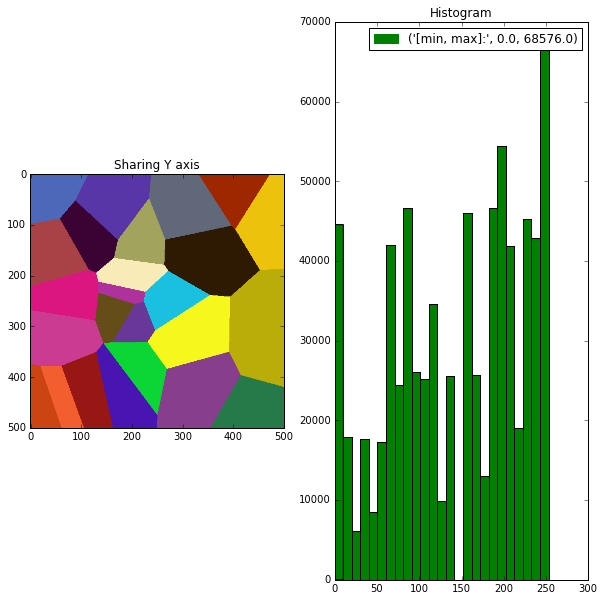

In [67]:
num_cells = 25
vizOutcomeSimulation(num_cells)

[min, max]: 0.0 54268.0


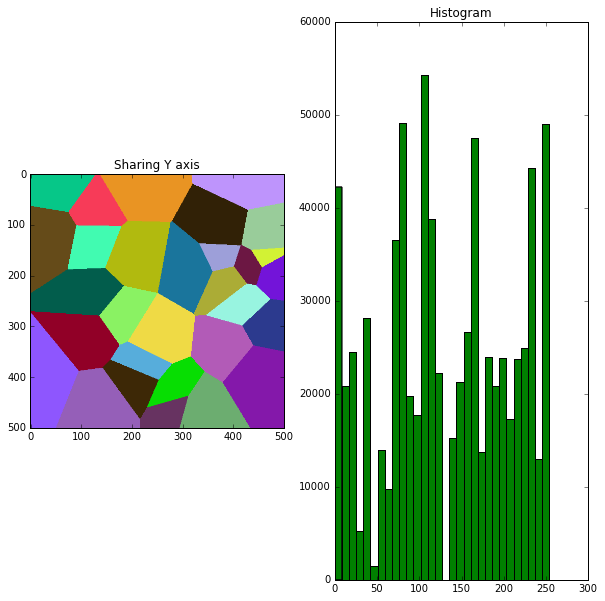

In [52]:
num_cells = 30
vizOutcomeSimulation(num_cells)

In [2]:
from skimage import data
from skimage.morphology import disk
from skimage.filters.rank import noise_filter
from skimage import filters
from skimage.filters.rank import mean_bilateral
#from skimage.filters.rank import median

In [3]:
#img = data.coins()
#im = median(img, disk(2))

img = data.coins().astype(np.uint16)
#im = median(img, disk(2))
im = mean_bilateral(img, disk(3), s0=10,s1=10)
im.shape

NameError: name 'np' is not defined

In [44]:
import matplotlib.pyplot as plt
%matplotlib inline

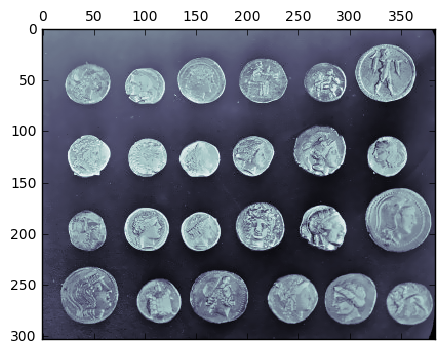

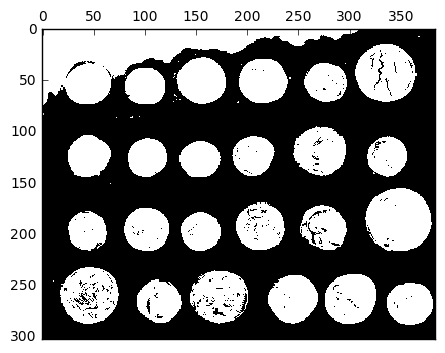

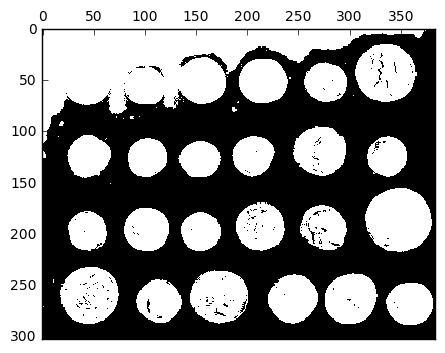

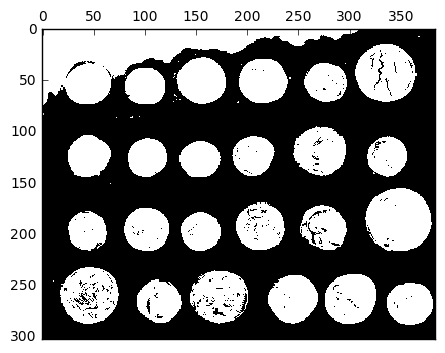

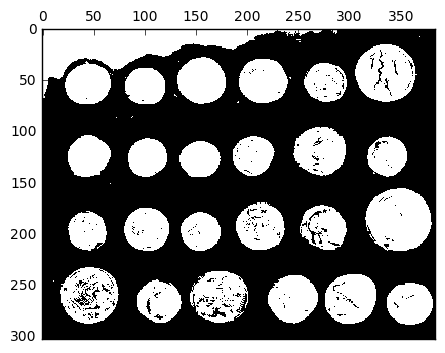

In [45]:
fig, ax = plt.subplots(1)
ax.matshow(im, cmap='bone')
from skimage import filters
for threshold in [filters.threshold_isodata, 
                  filters.threshold_li,
                  filters.threshold_otsu, 
                  filters.threshold_yen]:

    fig, ax = plt.subplots(1)
    th = threshold(im)
    binary = im >= th
    ax.matshow(binary, cmap='bone')

In [33]:
from scipy import ndimage as ndi
import matplotlib.pyplot as plt
import numpy as np

from skimage.morphology import watershed, disk
from skimage import data
from skimage.filters import rank
from skimage.util import img_as_ubyte

image = np.zeros(im.shape)
for threshold in [filters.threshold_isodata, 
                  filters.threshold_li,
                  filters.threshold_otsu, 
                  filters.threshold_yen]:

th_otsu = filters.threshold_otsu(im)
image[im>th_otsu] = 1

# find continuous region (low gradient -
# where less than 10 for this image) --> markers
# disk(5) is used here to get a more smooth image
markers = rank.gradient(image, disk(5)) < 10
markers = ndi.label(markers)[0]

# local gradient (disk(2) is used to keep edges thin)
gradient = rank.gradient(image, disk(2))

# process the watershed
labels = watershed(gradient, markers)

# display results
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(8, 8), sharex=True, 
                         sharey=True, subplot_kw={'adjustable':'box-forced'})
ax = axes.ravel()

ax[0].imshow(image, cmap=plt.cm.gray, interpolation='nearest')
ax[0].set_title("Original")

ax[1].imshow(gradient, cmap=plt.cm.hot, interpolation='nearest')
ax[1].set_title("Local Gradient")

ax[2].imshow(markers, cmap=plt.cm.spectral, interpolation='nearest')
ax[2].set_title("Markers")

ax[3].imshow(im, cmap=plt.cm.gray, interpolation='nearest')
ax[3].imshow(labels, cmap=plt.cm.spectral, interpolation='nearest', alpha=.7)
#ax[3].imshow(labels<3, cmap=plt.cm.bone, interpolation='nearest', alpha=.7)
ax[3].set_title("Segmented")

for a in ax:
    a.axis('off')

fig.tight_layout()
plt.show()

IndentationError: expected an indented block (<ipython-input-33-4bc440d14f68>, line 16)

In [10]:
## Implements median and otsu together and appliable to 3d images
from dipy.segment.mask import median_otsu
t1_mask, mask = median_otsu(t1_data)

//anaconda/lib/python3.5/site-packages/skimage/filter/__init__.py:6: skimage_deprecation: The `skimage.filter` module has been renamed to `skimage.filters`.  This placeholder module will be removed in v0.13.
  warn(skimage_deprecation('The `skimage.filter` module has been renamed '


NameError: name 't1_data' is not defined